In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.interpolate import CubicSpline

In [2]:
file_names = [
    "RMFK_Results/mass-300-life-0.010.npz", 
    "RMFK_Results/mass-300-life-0.013.npz",
    "RMFK_Results/mass-300-life-0.017.npz",
    "RMFK_Results/mass-300-life-0.022.npz",
    "RMFK_Results/mass-300-life-0.030.npz",
    "RMFK_Results/mass-300-life-0.040.npz",
    "RMFK_Results/mass-300-life-0.053.npz",
    "RMFK_Results/mass-300-life-0.070.npz",
    "RMFK_Results/mass-300-life-0.093.npz",
    "RMFK_Results/mass-300-life-0.122.npz",
    "RMFK_Results/mass-300-life-0.166.npz",
    "RMFK_Results/mass-300-life-0.221.npz",
    "RMFK_Results/mass-300-life-0.282.npz",
    "RMFK_Results/mass-300-life-0.373.npz",
    "RMFK_Results/mass-300-life-0.517.npz",
    "RMFK_Results/mass-300-life-0.664.npz",
    "RMFK_Results/mass-300-life-0.912.npz",
    "RMFK_Results/mass-300-life-1.236.npz",
    "RMFK_Results/mass-300-life-1.495.npz",
    "RMFK_Results/mass-300-life-1.846.npz"
]

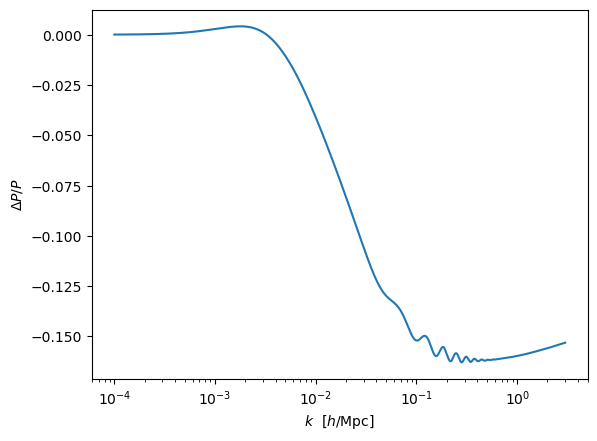

In [3]:
masses = np.linspace(0.05, 0.45, 20)
T, N, B, oneoverd = nufit.v_masses_sterile(0.1, True, file_names[0], "test", make_plot=True, sum_mnu_filename=True, coeffs = True)
ster_model = np.load("test312.npz", allow_pickle = True)

In [4]:
name = f"{0.1}meV"
nufit.v_masses_std(0.1, True, name)
std_model = np.load(f"{name}.npz", allow_pickle=True)

In [5]:
print(T)

1.1236180904522612


In [6]:
masses = np.linspace(0.05, 0.45, 20)
LCDM = np.load("LambdaCDM.npz", allow_pickle=True)

def mps_diff_ster(mass_val, input_file, t = None):
    name = f"small_mnu:{mass_val}"

    if t is None:
        T, N, B, oneoverd = nufit.v_masses_sterile(mass_val, True, input_file, name, coeffs=True)

    else: 
        T, N, B, oneoverd = nufit.v_masses_sterile(mass_val, True, input_file, name, coeffs=True, parameter = t)

    nu_out = np.load(f"{name}.npz", allow_pickle=True)
    return nu_out, T, N, B, oneoverd

def mps_diff_std(mass_val, plot):
    name = f"{mass_val}meV"
    nufit.v_masses_std(mass_val, True, name)
    nu_mass_val = np.load(f"{name}.npz", allow_pickle=True)

    if plot == True:
        plt.figure()
        plt.semilogx(nu_mass_val['k_n_array'], (nu_mass_val['Pk_n_array']-LCDM['Pk_LambdaCDM'])/LCDM['Pk_LambdaCDM'])
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
        plt.ylabel(r'$\Delta P / P$')
        plt.title(f"Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = {mass_val*1000} meV and $M_ν$ = 0")

    return nu_mass_val

In [ ]:
mass_ster = np.zeros(len(masses))
deltap_ster = np.zeros(len(masses))
t_vals = np.zeros(len(masses))
n_vals = np.zeros(len(masses))
b_vals = np.zeros(len(masses))
oned = np.zeros(len(masses)) 
input_file = "RMFK_Results/mass-300-life-0.010.npz"

for i in range(len(masses)):
    val = masses[i]
    file, T, N, B, oneoverd  = mps_diff_ster(val, input_file)

    mass_ster[i] = file['sum_nu']
    deltap_ster[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])
    t_vals[i] = T
    n_vals[i] = N
    b_vals[i] = B
    oned[i] = oneoverd

In [ ]:
mass_std = np.zeros(len(masses))
deltap_std = np.zeros(len(masses))

for i in range(len(masses)):
    mass_val = masses[i]
    std_file = mps_diff_std(mass_val, False)
    
    mass_std[i] = std_file['sum_nu']
    deltap_std[i] = ((std_file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
def cubic_spline(x, y, plot):
    f = CubicSpline(x, y, bc_type='natural')
    x_new = np.linspace(x[0], x[-1], 100)
    y_new = f(x_new)

    if plot == True:
        plt.plot(x_new, y_new, 'black')
        plt.plot(x, y, 'bo')
        plt.xlabel('Standard $M_ν$')
        plt.ylabel('Sterile $M_ν$')
        plt.show()
    
    return f 

In [ ]:
std_fun = cubic_spline(np.flip(deltap_std), np.flip(mass_std), False)
stdm_from_sterp = np.zeros(len(deltap_ster))

for i in range(len(deltap_ster)):
    stdm_from_sterp[i] = std_fun(deltap_ster[i])

In [ ]:
plt.figure()
plt.plot(stdm_from_sterp, mass_ster)  
plt.xlabel("Standard Mass")
plt.ylabel("Sterile Mass")

In [ ]:
new_t = t_vals[0] * 1.1
mass_ster10 = np.zeros(len(masses))
deltap_ster10 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], file_names[0], t = new_t)
    mass_ster10[i] = file['sum_nu']
    deltap_ster10[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
stdm_from_sterp10 = np.zeros(len(deltap_ster10))

for i in range(len(deltap_ster10)):
    stdm_from_sterp10[i] = std_fun(deltap_ster10[i])

In [ ]:
plt.figure()
plt.plot(stdm_from_sterp10, mass_ster) 
plt.xlabel("Standard Mass")
plt.ylabel("Sterile Mass")

In [ ]:
new_t2 = t_vals[0] * 1.9
mass_ster90 = np.zeros(len(masses))
deltap_ster90 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], file_names[0], t = new_t2)
    mass_ster90[i] = file['sum_nu']
    deltap_ster90[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
stdm_from_sterp90 = np.zeros(len(deltap_ster90))

for i in range(len(deltap_ster90)):
    stdm_from_sterp90[i] = std_fun(deltap_ster90[i])

In [ ]:
plt.figure()
plt.plot(stdm_from_sterp90, mass_ster) 
plt.xlabel("Standard Mass")
plt.ylabel("Sterile Mass")

In [ ]:
short_lived = "RMFK_Results/mass-300-life-0.030.npz"
long_lived = "RMFK_Results/mass-300-life-0.912.npz"

In [ ]:
shortmass_ster = np.zeros(len(masses))
shortdeltap_ster = np.zeros(len(masses))
short_t_val = 0

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], short_lived)
    shortmass_ster[i] = file['sum_nu']
    shortdeltap_ster[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])
    short_t_val = t

short_new_t = t_val * 1.1
print(short_new_t)

In [ ]:
short_stdm = np.zeros(len(shortdeltap_ster))

for i in range(len(shortdeltap_ster)):
    short_stdm[i] = std_fun(shortdeltap_ster[i])

In [ ]:
plt.figure()
plt.plot(short_stdm, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Short Lived Model")

In [ ]:
shortmass_ster10 = np.zeros(len(masses))
shortdeltap_ster10 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], short_lived, t = short_new_t)
    shortmass_ster10[i] = file['sum_nu']
    shortdeltap_ster10[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
short_stdm_10 = np.zeros(len(shortdeltap_ster10))

for i in range(len(shortdeltap_ster10)):
    short_stdm_10[i] = std_fun(shortdeltap_ster10[i])

In [ ]:
plt.figure()
plt.plot(short_stdm_10, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Short Lived Model (T 10% Larger)")

In [ ]:
short_new_t2 = t_val * 1.9
print(short_new_t2)

shortmass_ster90 = np.zeros(len(masses))
shortdeltap_ster90 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], short_lived, t = short_new_t2)
    shortmass_ster90[i] = file['sum_nu']
    shortdeltap_ster90[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

short_stdm_90 = np.zeros(len(shortdeltap_ster90))


for i in range(len(shortdeltap_ster90)):
    short_stdm_90[i] = std_fun(shortdeltap_ster90[i])


plt.figure()
plt.plot(short_stdm_90, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Short Lived Model (T 90% Larger)")

In [ ]:
longmass_ster = np.zeros(len(masses))
longdeltap_ster = np.zeros(len(masses))
long_t_val = 0

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], long_lived)
    longmass_ster[i] = file['sum_nu']
    longdeltap_ster[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])
    long_t_val = t

long_stdm = np.zeros(len(longdeltap_ster))

for i in range(len(longdeltap_ster)):
    long_stdm[i] = std_fun(longdeltap_ster[i])

plt.figure()
plt.plot(long_stdm, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Long Lived Model")

In [ ]:
long_new_t = long_t_val * 1.1
print(long_new_t)

longmass_ster10 = np.zeros(len(masses))
longdeltap_ster10 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], long_lived, t = long_new_t)
    longmass_ster10[i] = file['sum_nu']
    longdeltap_ster10[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

long_stdm10 = np.zeros(len(longdeltap_ster10))

for i in range(len(longdeltap_ster10)):
    long_stdm10[i] = std_fun(longdeltap_ster10[i])

plt.figure()
plt.plot(long_stdm10, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Long Lived Model (T 10% Larger)")

In [ ]:
long_new_t2 = long_t_val * 1.9
print(long_new_t2)

longmass_ster90 = np.zeros(len(masses))
longdeltap_ster90 = np.zeros(len(masses))

for i in range(len(masses)):
    file, t, n, b, d = mps_diff_ster(masses[i], long_lived, t = long_new_t2)
    longmass_ster90[i] = file['sum_nu']
    longdeltap_ster90[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

long_stdm90 = np.zeros(len(longdeltap_ster90))

for i in range(len(longdeltap_ster90)):
    long_stdm90[i] = std_fun(longdeltap_ster90[i])

plt.figure()
plt.plot(long_stdm90, mass_ster) 
plt.xlabel("Standard Model")
plt.ylabel("Sterile Model")
plt.title("Long Lived Model (T 90% Larger)")